# **Project Phase 2: Model Execution Instructions**

This directory contains the source code for the 6 machine learning and statistical models applied to the NYC Green Taxi dataset for the EAS 587 course project.

## **Requirements**

* A web browser  
* A Google Account (for using Google Colab)

## **Files Included**

* `taxi_data.csv`: The dataset used by all notebooks.  
* `model_1_LinearRegression.ipynb`: Notebook for the Linear Regression model.  
* `model_2_KNN.ipynb`: Notebook for K-Nearest Neighbors and K-Means models.  
* `model_3_DecisionTree.ipynb`: Notebook for the Decision Tree classification model.  
* `model_4_RandomForest.ipynb`: Notebook for the Random Forest regression model.  
* `model_5_DBSCAN.ipynb`: Notebook for the DBSCAN clustering model.  
* `model_6_ARIMA.ipynb`: Notebook for the ARIMA and Prophet time-series models.

## **Step-by-Step Execution Instructions**

To reproduce the results, please follow these steps for each of the 6 notebooks.

1. **Navigate to Google Colab** Open your web browser and go to [https://colab.research.google.com/](https://colab.research.google.com/).  
2. **Upload Project Files** On the left-hand side of the Colab interface, click the **"Files"** icon (it looks like a folder). Click the **"Upload to session storage"** icon and select all the files from this `src/` directory (the 6 `.ipynb` notebooks and `taxi_data.csv`). Wait for all files to finish uploading.  
3. **Open a Notebook** In the file browser on the left, double-click on one of the notebook files (e.g., `LinearRegression.ipynb`) to open it in the main editor.  
4. **Run the Notebook** Once the notebook is open and has connected to a runtime, go to the top menu and select **Runtime \-\> Run all**.  
5. **View Results** The notebook will now execute from the first cell to the last, producing all the model metrics, tables, and visualizations described in the report.  
6. **Repeat for Other Models** Repeat steps 3-5 for the remaining 5 notebook files to see the results for each model. Make sure you upload the `taxi_data.csv` file for every python notebook.

**Important Note on Colab Runtimes:** The files uploaded to a Google Colab session are temporary. If your session disconnects or times out (e.g., after being idle), the uploaded files will be deleted. If this happens, you will need to re-upload the `taxi_data.csv` file (Step 2).



Random Forest (trip_duration) - MAE: 10.58 minutes
Random Forest (trip_duration) - RMSE: 78.42 minutes
Random Forest (trip_duration) - R²: -0.009


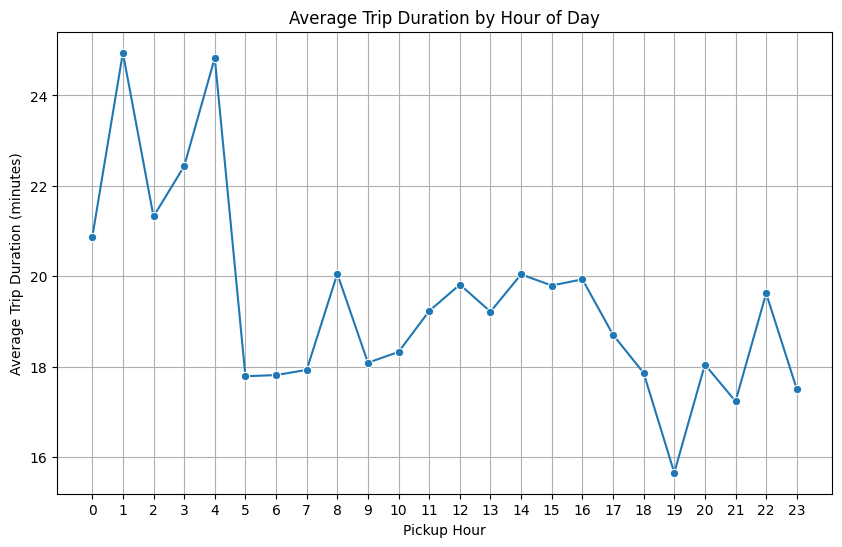

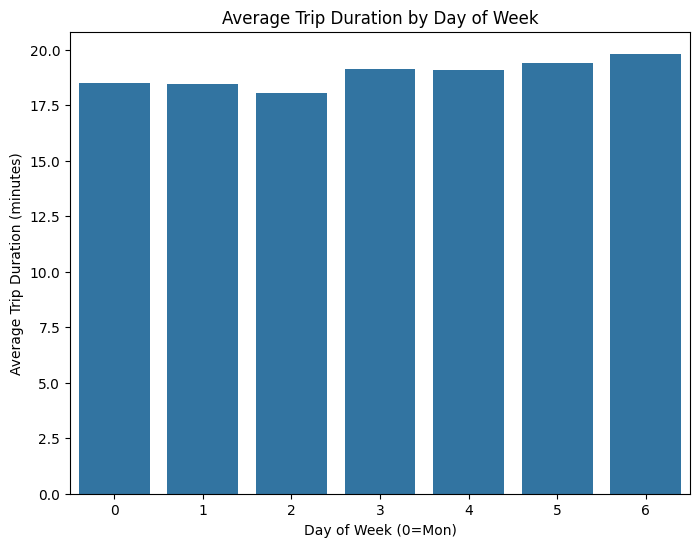

In [1]:
# =============================
# Random Forest Regressor for trip_duration
# =============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# -----------------------------
# 1. Load Dataset
# -----------------------------
df = pd.read_csv('taxi_data.csv', low_memory=False, dtype={'store_and_fwd_flag': 'str'})

# -----------------------------
# 2. Data Cleaning
# -----------------------------
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'], errors='coerce')
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'], errors='coerce')
df = df.dropna(subset=['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'trip_distance'])
df = df[(df['trip_distance'] > 0) & (df['trip_distance'] < 100)]
df = df[(df['passenger_count'] > 0) & (df['passenger_count'] < 8)]
df = df[(df['fare_amount'] > 0) & (df['fare_amount'] < 500)]

# -----------------------------
# 3. Feature Engineering
# -----------------------------
# Target: trip_duration in minutes
df['trip_duration'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds() / 60

# Temporal features
df['pickup_hour'] = df['lpep_pickup_datetime'].dt.hour
df['pickup_dayofweek'] = df['lpep_pickup_datetime'].dt.dayofweek
df['is_weekend'] = df['pickup_dayofweek'].isin([5,6]).astype(int)

# Route feature
df['route'] = df['PULocationID'].astype(str) + '_' + df['DOLocationID'].astype(str)
route_freq = df['route'].value_counts(normalize=True)
df['route_freq'] = df['route'].map(route_freq)

# Features
features = ['trip_distance', 'fare_amount', 'passenger_count', 'extra', 'mta_tax',
            'tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge',
            'pickup_hour', 'pickup_dayofweek', 'is_weekend', 'route_freq']

X = df[features]
y = df['trip_duration']

# -----------------------------
# 4. Train/Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------
# 5. Train Random Forest Regressor
# -----------------------------
rf_model = RandomForestRegressor(n_estimators=150, max_depth=15, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# -----------------------------
# 6. Evaluate Model
# -----------------------------
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Random Forest (trip_duration) - MAE: {mae:.2f} minutes")
print(f"Random Forest (trip_duration) - RMSE: {rmse:.2f} minutes")
print(f"Random Forest (trip_duration) - R²: {r2:.3f}")

# -----------------------------
# 7. Visualizations
# -----------------------------
# Trip Duration by Hour (new visualization)
hourly_duration = df.groupby('pickup_hour')['trip_duration'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(x='pickup_hour', y='trip_duration', data=hourly_duration, marker='o')
plt.xticks(range(0,24))
plt.xlabel('Pickup Hour')
plt.ylabel('Average Trip Duration (minutes)')
plt.title('Average Trip Duration by Hour of Day')
plt.grid(True)
plt.show()

# Trip Duration by Day of Week
dow_duration = df.groupby('pickup_dayofweek')['trip_duration'].mean().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='pickup_dayofweek', y='trip_duration', data=dow_duration)
plt.xlabel('Day of Week (0=Mon)')
plt.ylabel('Average Trip Duration (minutes)')
plt.title('Average Trip Duration by Day of Week')
plt.show()
